<a href="https://colab.research.google.com/github/Shakib-IO/INSE_6220_Lab_Winter_2023/blob/main/Week_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Control Charts

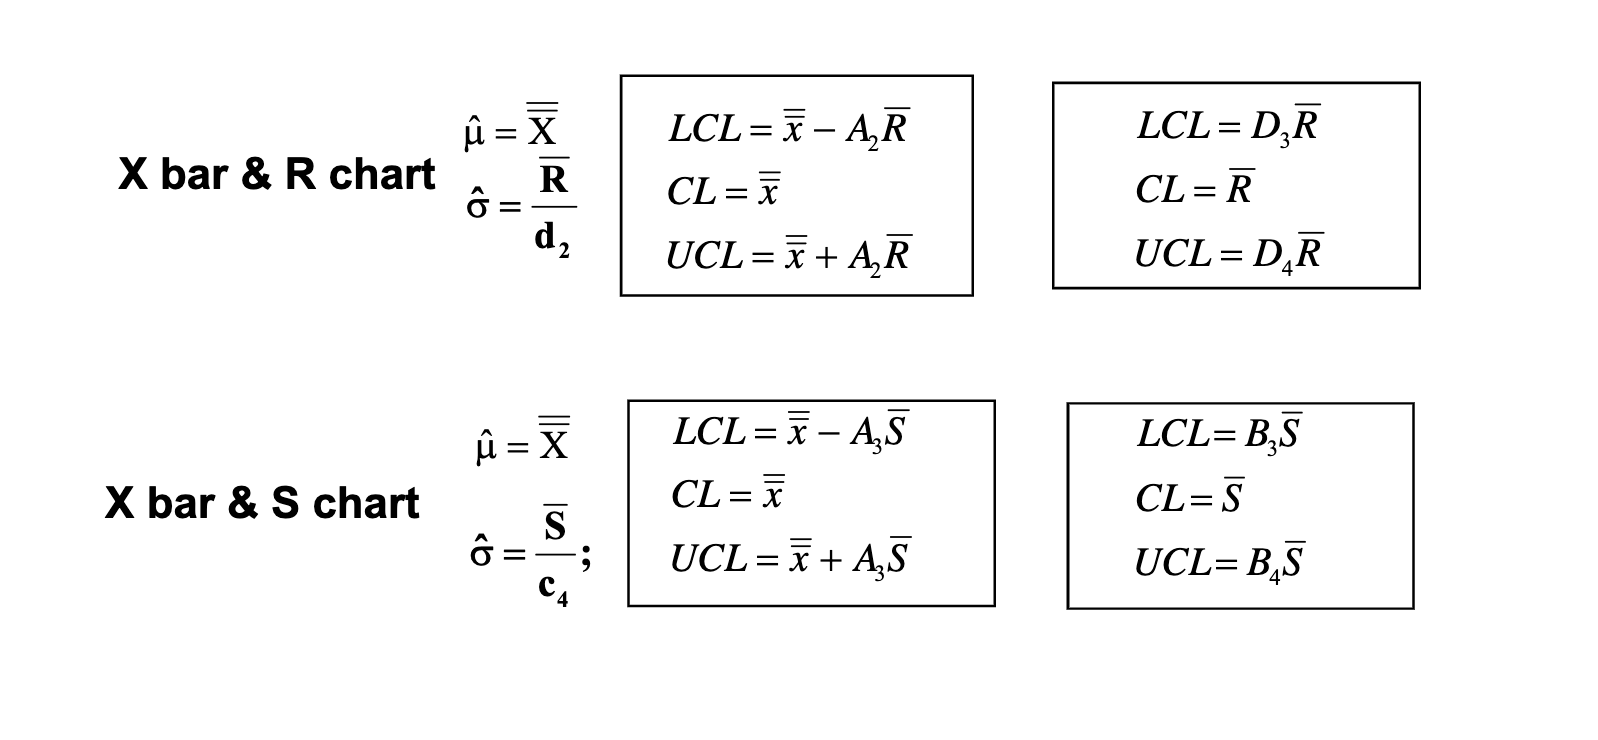

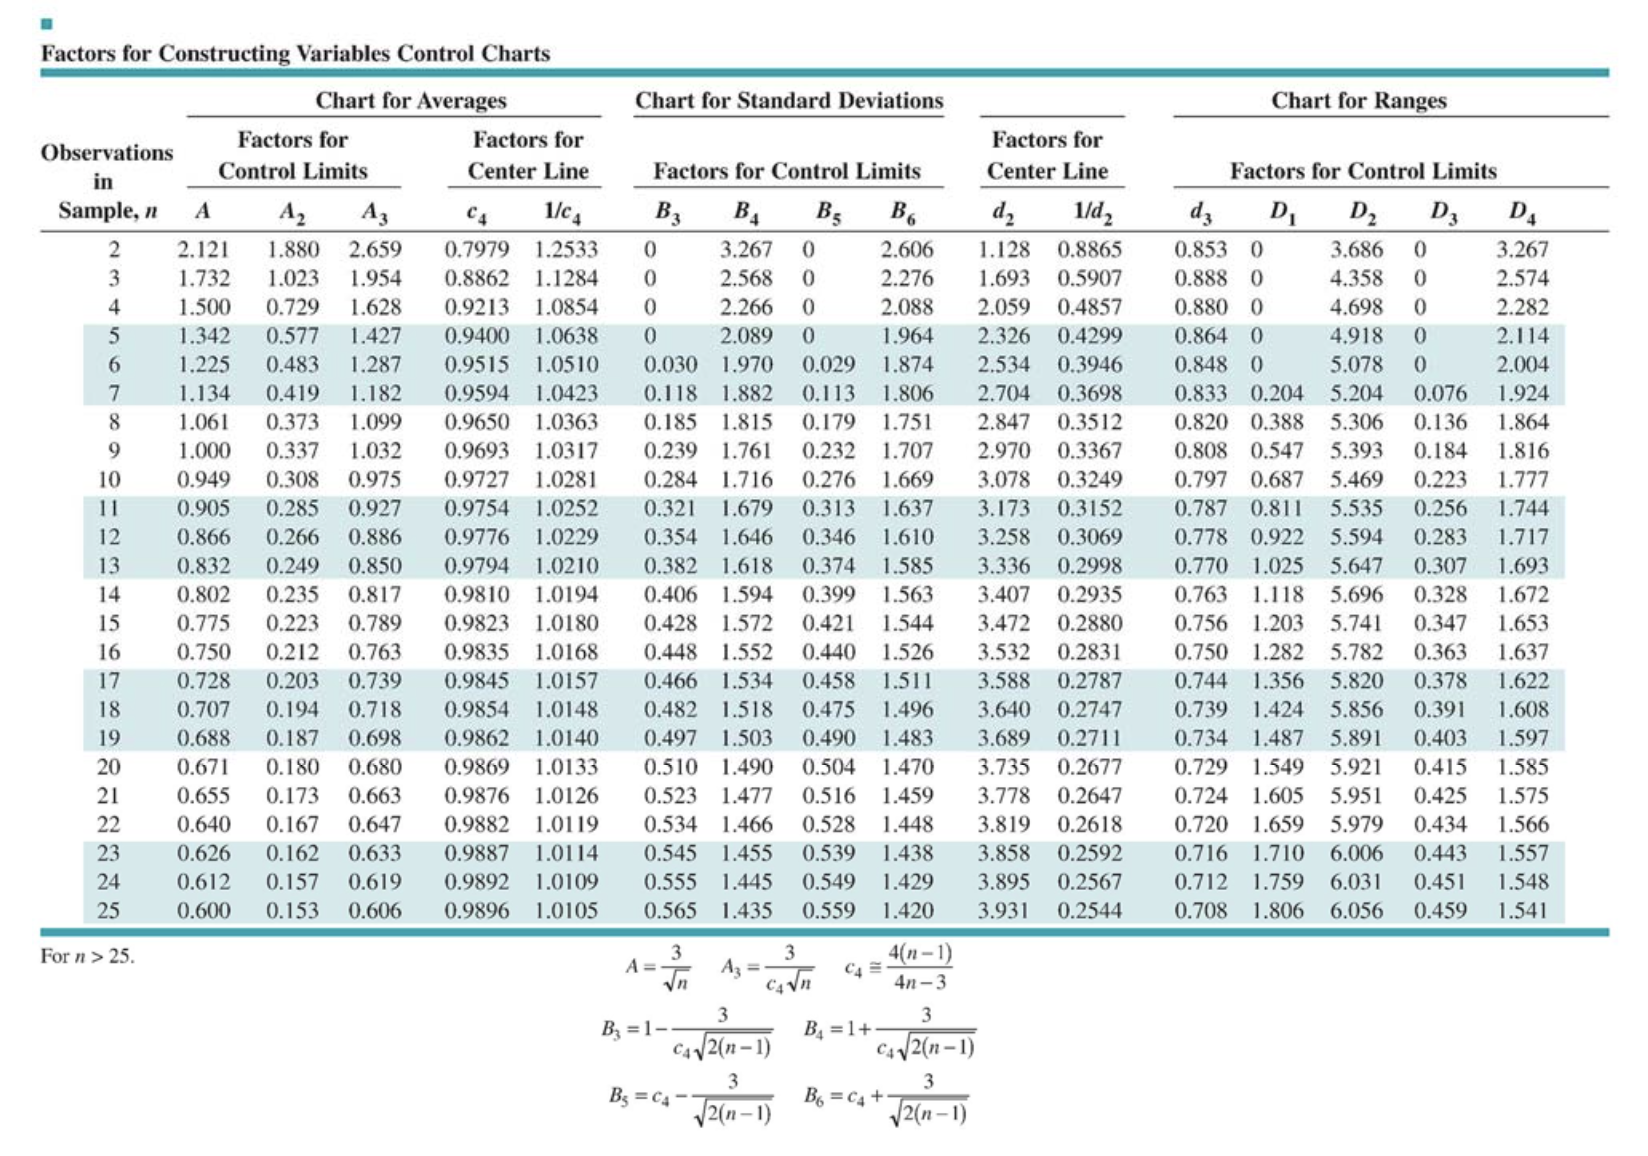

In [1]:
!pip install pyspc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyspc: filename=pyspc-0.4-py3-none-any.whl size=30872 sha256=48879dfad3db6fa17717bc6bf576c3f3515902f1fe95c0ec2c10b293113125ce
  Stored in directory: /root/.cache/pip/wheels/bb/2c/4e/106a1df998f16318b19dcf3b934e318e9866f8e2af7421617c
Successfully built pyspc


In [2]:
#from pyspc import spc, xbar_rbar, rbar, rules
import numpy as np
#from scipy import stats
from scipy.stats import norm
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [ ]:
uploaded = files.upload()

In [8]:
X = pd.read_csv('https://github.com/Shakib-IO/INSE_6220_Lab_Winter_2023/blob/main/customers.csv?raw=true', index_col=0)
print(X)

     X1   X2   X3   X4
0   7.2  8.4  7.9  4.9
1   5.6  8.7  3.3  4.2
2   5.5  7.3  3.2  6.0
3   4.4  8.0  5.4  7.4
4   9.7  4.6  4.8  5.8
5   8.3  8.9  9.1  6.2
6   4.7  6.6  5.3  5.8
7   8.8  5.5  8.4  6.9
8   5.7  4.7  4.1  4.6
9   4.9  6.2  7.8  8.7
10  7.1  6.3  8.2  5.5
11  7.1  5.8  6.9  7.0
12  6.7  6.9  7.0  9.4
13  5.5  6.3  3.2  4.9
14  4.9  5.1  3.2  7.6
15  3.7  4.0  3.0  5.2
16  2.6  3.9  5.2  4.8
17  4.6  2.7  6.3  3.4
18  7.2  8.0  4.1  5.9
19  6.1  3.4  7.2  5.9


#### Questions
**a) Construct a table that displaying the sample means and sample ranges.<br>
b) Estimate the process mean and standard deviation.<br>
c) Construct the R and the X-charts. Identify the out-of-control points using all Western Electric rules. If necessary, revise your control limits, assuming that any samples that violate Western Electric rules can de discarded.**

*a) Construct a table that displaying the sample means and sample ranges*

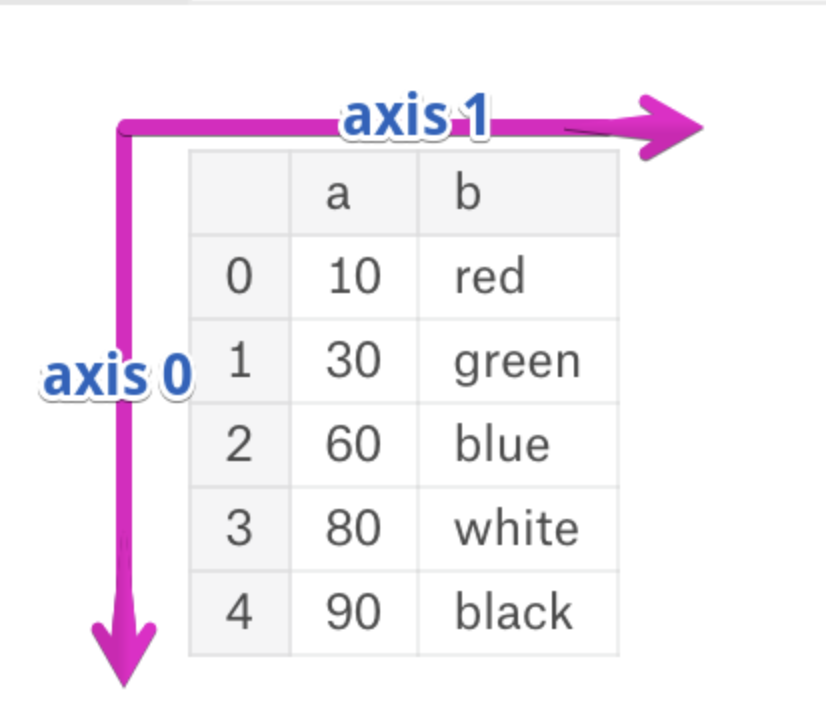

In [9]:
X['X-Bar'] = X.mean(axis = 1)
X['R'] = X.max(axis = 1) - X.min(axis = 1)
print(X)

     X1   X2   X3   X4  X-Bar    R
0   7.2  8.4  7.9  4.9  7.100  3.5
1   5.6  8.7  3.3  4.2  5.450  5.4
2   5.5  7.3  3.2  6.0  5.500  4.1
3   4.4  8.0  5.4  7.4  6.300  3.6
4   9.7  4.6  4.8  5.8  6.225  5.1
5   8.3  8.9  9.1  6.2  8.125  2.9
6   4.7  6.6  5.3  5.8  5.600  1.9
7   8.8  5.5  8.4  6.9  7.400  3.3
8   5.7  4.7  4.1  4.6  4.775  1.6
9   4.9  6.2  7.8  8.7  6.900  3.8
10  7.1  6.3  8.2  5.5  6.775  2.7
11  7.1  5.8  6.9  7.0  6.700  1.3
12  6.7  6.9  7.0  9.4  7.500  2.7
13  5.5  6.3  3.2  4.9  4.975  3.1
14  4.9  5.1  3.2  7.6  5.200  4.4
15  3.7  4.0  3.0  5.2  3.975  2.2
16  2.6  3.9  5.2  4.8  4.125  2.6
17  4.6  2.7  6.3  3.4  4.250  3.6
18  7.2  8.0  4.1  5.9  6.300  3.9
19  6.1  3.4  7.2  5.9  5.650  3.8


In [11]:
print(f"The X double Bar is: {X['X-Bar'].mean(axis=0)}")
print(f"The R double Bar is: {X['R'].mean(axis=0)}")

The X double Bar is: 5.94125
The R double Bar is: 3.275


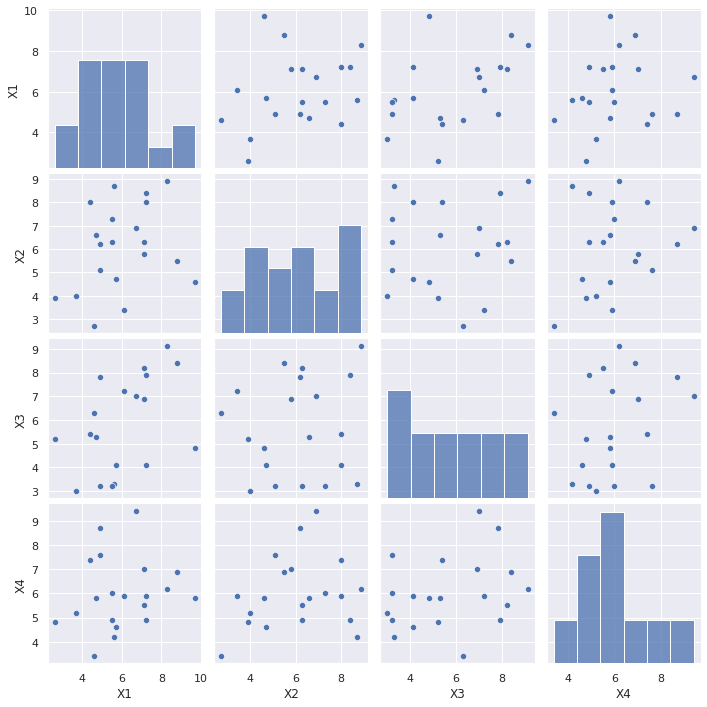

In [ ]:
#pairplot
sns.pairplot(X)

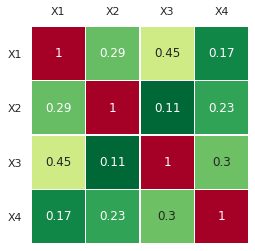

In [ ]:
#Correlation matrix
plt.figure()
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)

In [ ]:
#(a) and (b)
X = np.array(X)
Xbar = np.mean(X, axis=1)
Xbarbar = np.mean(Xbar)
R = np.ptp(X, axis=1)
Rbar = np.mean(R)
d2 = 2.059
sigmahat = Rbar/d2
print('The process mean and standard deviation are:')
print('Xbarbar = {0:.2f}, sigmahat = {1:.2f}'.format(Xbarbar, sigmahat))

The process mean and standard deviation are:
Xbarbar = 5.94, sigmahat = 1.59


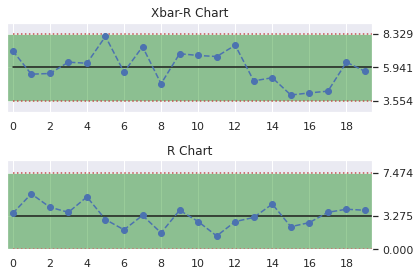

<pyspc: (8744941528584)>


In [ ]:
#(c) Plot X-bar and R charts
chart = spc(X) + xbar_rbar() + rbar() + rules()
print(chart)

In [ ]:
#Delete outliers 16 and 17
X = np.delete(X, [16, 17], axis=0)
Xbar = np.mean(X, axis=1)
Xbarbar = np.mean(Xbar)
R = np.ptp(X, axis=1)
Rbar = np.mean(R)
d2 = 2.059
sigmahat = Rbar/d2
print('The revised grand mean and mean range are:')
print('Xbarbar = {0:.2f}, Rbar = {1:.2f}'.format(Xbarbar, Rbar))

The revised grand mean and mean range are:
Xbarbar = 6.14, Rbar = 3.29


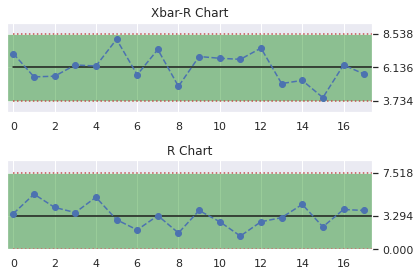

<pyspc: (8744941464559)>


In [ ]:
#(c) Plot revised X-bar and R charts
chart = spc(X) + xbar_rbar() + rbar() + rules()
print(chart)

In [ ]:
#(d) 
LSL = 1;  USL = 11
Cp = (USL-LSL)/(6*sigmahat)
CpL = (Xbarbar-LSL)/(3*sigmahat)
CpU = (USL-Xbarbar)/(3*sigmahat)
Cpk = np.min([CpL, CpU])
print('The process capability indices are:')
print('Cp = {0:.2f}, CpL = {1:.2f}, CpU = {2:.2f}, Cpk = {3:.2f}'.format(Cp, CpL, CpU, Cpk))
#Percentage of Nonconforming
PNC = 1-(norm.cdf((USL-Xbarbar)/sigmahat)-norm.cdf((LSL-Xbarbar)/sigmahat))
print('The total percentage of nonconforming produced by the process is:')
print('PNC = {:.4f}'.format(PNC))

The process capability indices are:
Cp = 1.04, CpL = 1.07, CpU = 1.01, Cpk = 1.01
The total percentage of nonconforming produced by the process is:
PNC = 0.0018
